# Ex09. 프로젝트: 인물 모드 문제점 찾기

## 0. 환경설정 및 라이브러리 불러오기

In [1]:
! mkdir -p ~/aiffel/human_segmentation/models
! mkdir -p ~/aiffel/human_segmentation/images
! ln -s ~/data/* ~/aiffel/human_segmentation/images

ln: failed to create symbolic link '/aiffel/aiffel/human_segmentation/images/my_image.png': File exists


In [2]:
import os
import cv2
import urllib
import numpy as np
import pixellib
from pixellib.semantic import semantic_segmentation
from importlib.metadata import version
from matplotlib import pyplot as plt

print(cv2.__version__)
print(version('pixellib'))

4.5.3
0.7.1


## 1. 인물모드 직접 해 보기

### 1-1 아웃포커싱 효과가 적용된 인물모드 사진

(2592, 4608, 3)


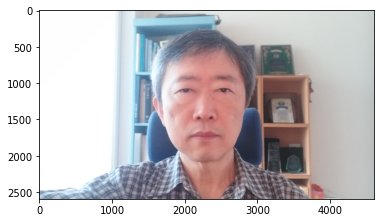

In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'  
img_orig = cv2.imread(img_path+'YJKim_Land.png') 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
## PixelLib에서 제공해 주는 모델을 다운로드

# 저장할 파일 이름을 결정
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환
#    model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에
#   "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장

# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 

# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작
# urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 
# 다운로드 해서 model_file 파일명으로 저장
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f76f141d280>)

In [5]:
## 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성

# PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

# 이제 모델에 이미지를 입력
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴
# 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path+'YJKim_Land.png')

In [6]:
# pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

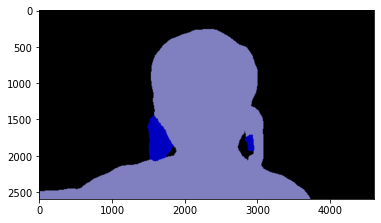

In [7]:
# segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중
# output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [8]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [9]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [10]:
# 아래 코드를 이해하지 않아도 좋습니다. PixelLib에서 그대로 가져온 코드입니다.
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
# 컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

In [12]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있으므로
seg_color = (128,128,192)

(2592, 4608)


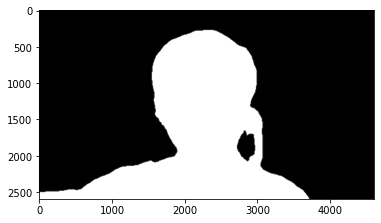

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됨
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

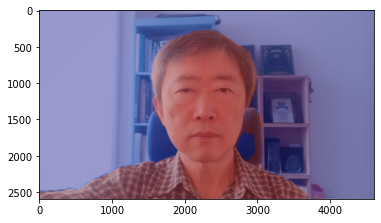

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤
# 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 바꿔봄
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스크를 적당한 비율로 합쳐봄
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

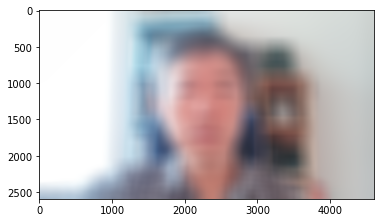

In [15]:
img_orig_blur = cv2.blur(img_orig, (256,256))  # (256,256)은 blurring kernel size
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽으므로
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

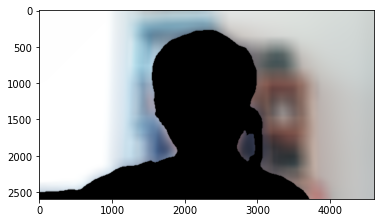

In [16]:
## 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽으므로
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0이 됨
img_bg_mask = cv2.bitwise_not(img_mask_color)
# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있음
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됨. 결국 사람이 사라지고 배경만 남음
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

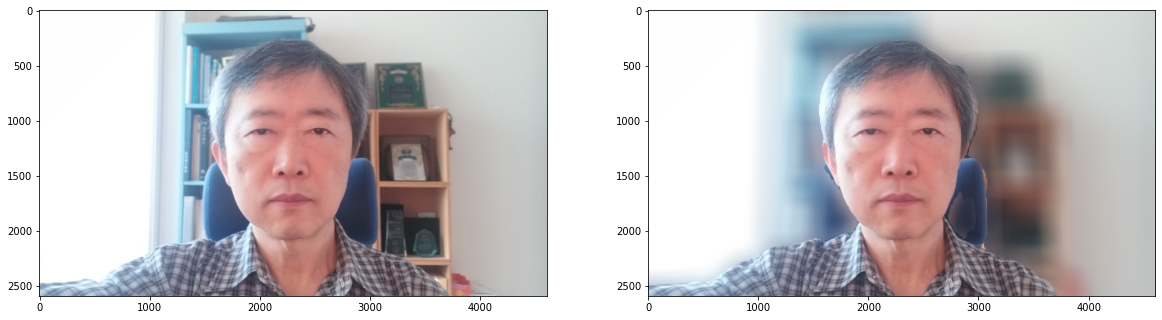

True

In [17]:
## 배경 영상과 사람 영상을 합치기

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
images = [cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
plt.show()

# 문제있는 사진 별도 저장
cv2.imwrite(img_path+'img_concat_problem.png', img_concat)

#### 아웃포커싱 효과가 적용된  사진의 의자 머리받침 일부에 아웃포커싱 효과가 적용되지 않았고
#### 배경과 사람의 경계부분이 자연스럽지 못한 현상이 발생했다.

### 1-2 아웃포커싱 효과가 적용된 동물 사진
인터넷에서 배경이 가급적 선명한 동물사진을 다운받아 png 파일로 변환하였다.

(1272, 1920, 3)


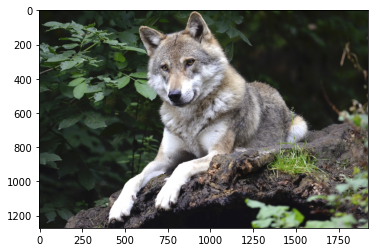

In [18]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'  
img_orig = cv2.imread(img_path+'wolf.png') 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [19]:
# 이제 모델에 이미지를 입력
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴
# 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path+'wolf.png')

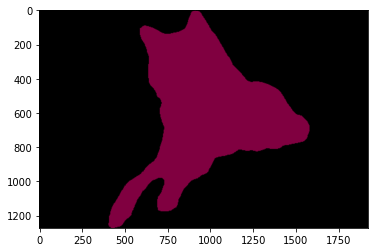

In [20]:
# segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 
# output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [21]:
# segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력
segvalues

{'class_ids': array([ 0, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [22]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog


In [23]:
# 컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [24]:
# LABEL_NAMES = [
#    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
#    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
#    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv']

# 컬러맵 3에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 12번째인 'dog')
colormap[12]

array([ 64,   0, 128])

In [25]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있으므로
seg_color = (128, 0, 64)

(1272, 1920)


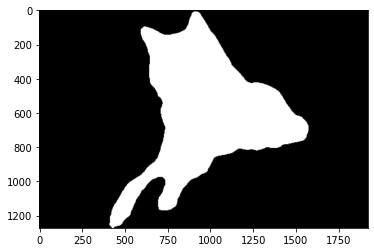

In [26]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됨
# seg_color 값이 person을 값이므로 동물이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

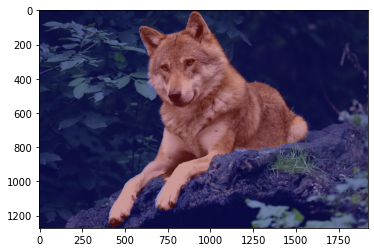

In [27]:
# 원본이미지를 img_show에 할당한뒤 이미지 동물이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤
# 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 바꿔봄
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스크를 적당한 비율로 합침
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

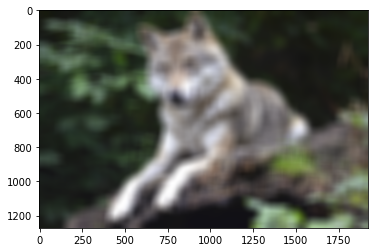

In [28]:
img_orig_blur = cv2.blur(img_orig, (64,64))  # (64,64)은 blurring kernel size
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽으므로
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

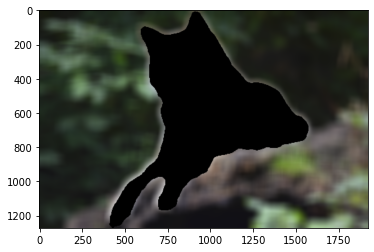

In [29]:
## 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 동물이 255 였으나
# 연산을 하고 나면 배경은 255 동물은 0이 됨
img_bg_mask = cv2.bitwise_not(img_mask_color)
# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있음
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 동물이 0인 경우에는 동물이 있던 모든 픽셀이 0이 됨. 결국 동물이 사라지고 배경만 남음
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

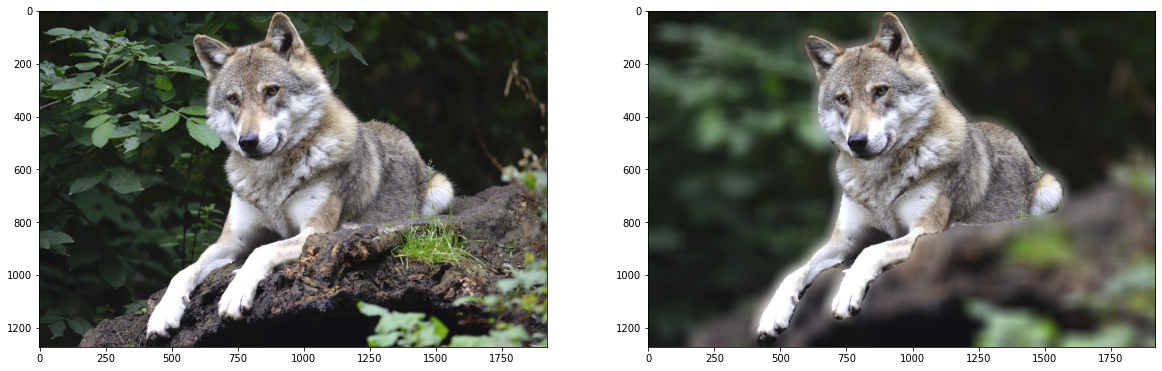

In [30]:
## 배경 영상과 동물 영상 합치기

img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

fig, ax = plt.subplots(3, 2, figsize=(20, 20))
images = [cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
plt.show()

#### 아웃포커싱 효과가 적용된 동물 사진이 잘 작성되었다.

### 1-3 배경전환 크로마키사진

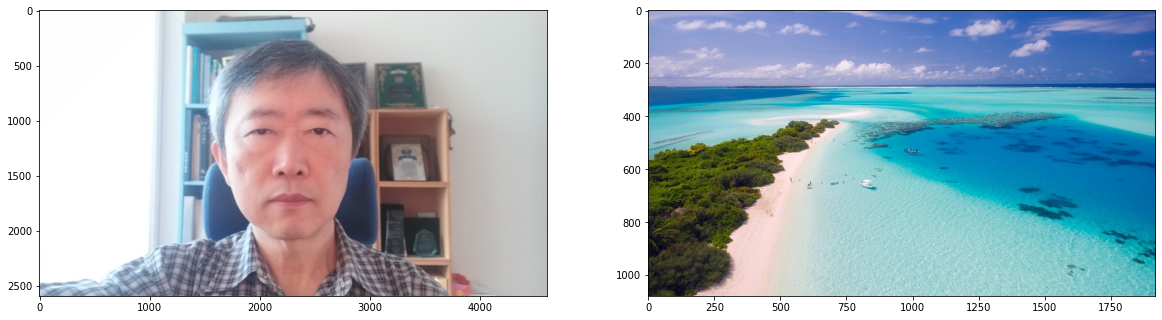

(2592, 4608, 3) (1080, 1920, 3)


In [31]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'  
img_orig = cv2.imread(img_path+'YJKim_Land.png') 
img_bgrd = cv2.imread(img_path+'BG_Sea.png') 

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
images = [cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_bgrd, cv2.COLOR_BGR2RGB)]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
plt.show()

print(img_orig.shape, img_bgrd.shape)

In [32]:
## 이미지 크기가 달라 원본사진을 배경사진 크기로 줄임

h = img_bgrd.shape[0]
w = img_bgrd.shape[1]
img_orig_resized = cv2.resize(img_orig, (w,h)) # cv2.resize(image객체 행렬, (가로 길이, 세로 길이))

cv2.imwrite(img_path+'YJKim_Land_resized.png', img_orig_resized)
print(img_orig_resized.shape)

(1080, 1920, 3)


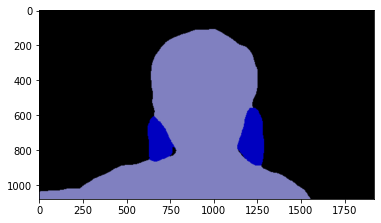

In [33]:
segvalues, output = model.segmentAsPascalvoc(img_path+'YJKim_Land_resized.png')
plt.imshow(output)
plt.show()

In [34]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [35]:
# 컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)
for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [36]:
# 컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

In [37]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서
seg_color = (128, 128, 192)

(1080, 1920)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]


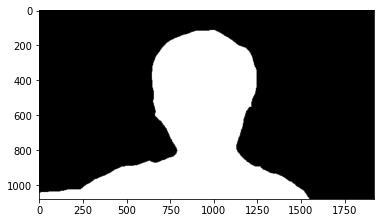

In [38]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape)
print(seg_map)
plt.imshow(seg_map, cmap='gray')
plt.show()

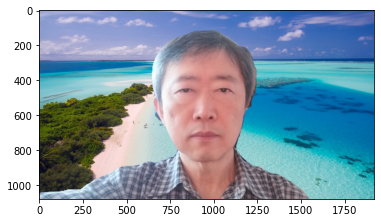

In [39]:
## 배경 이미지에 seg_map을 이용하여 원본 이미지를 합성

height = np.shape(img_bgrd)[0]
width = np.shape(img_bgrd)[1]
img_concat = np.zeros((height, width, 3))

for i in range(height):
    for k in range(width):
        for m in range(3):
            if seg_map[i][k]:
                img_concat[i][k][m] = img_orig_resized[i][k][2-m] / 255
            else:
                img_concat[i][k][m] = img_bgrd[i][k][2-m] / 255

plt.imshow(img_concat)
plt.show()

#### 배경화면이 산뜻하게 바뀌었다.

## 2. 사진에서 문제점 찾기

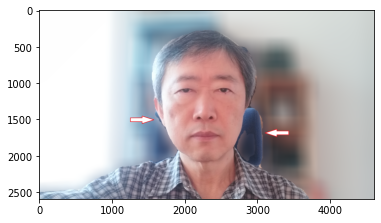

In [40]:
## 문제있는 부분 화살표 표기한 후 저장해 두었던 사진을 불러옴
img_orig = cv2.imread(img_path+'img_concat_problem_MarkUp.png') 

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

#### 아웃포커싱 효과가 적용된  사진의 의자 머리받침 일부에 아웃포커싱 효과가 적용되지 않았고
#### 배경과 사람의 경계부분이 자연스럽지 못한 현상이 발생했다.

## 3. 해결 방법을 제안해 보기

#### 아래와 같이 해결방안을 강구하고 실행
1. Semantic segmentation mask가 pixel level에서의 RGB값을 이용하여 사물을 구분하므로 이 값을 조금씩 바꾸어
   주면 결과가 바뀔것으로 생각된다.
2. 문제가 되는 부분의 색상을 바꿀 수도 있으나 일반적인 작업은 아닌것으로 생각되어 이미지 전체를 밝게,
   또는 어둡게 변경하는것이 좋아보인다.
3. 배경과 얼굴의 경계부분이 자연스럽지 않은것은 blur 처리하지 않은 mask image가 0, 1 (False, True)이기
   때문으로 생각되어 mask image도 blur 처리를 하면 좋아질것으로 생각된다.

(2592, 4608, 3)


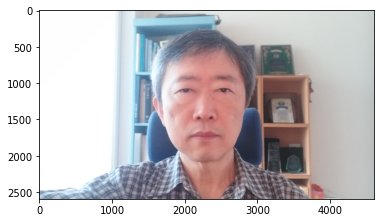

In [41]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/'  
img_orig = cv2.imread(img_path+'YJKim_Land.png') 
print(img_orig.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

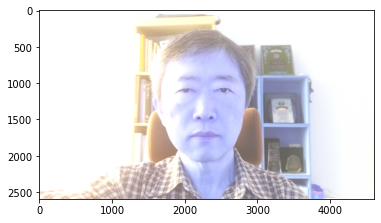

In [42]:
## 사진 이미지를 밝은 상태로 변환  ## ====================================================================
val = 64
array = np.full(img_orig.shape, (val, val, val), dtype=np.uint8)
YJKim_Bright = cv2.add(img_orig, array)

cv2.imwrite(img_path+'YJKim_Bright.png', YJKim_Bright)
plt.imshow(YJKim_Bright)
plt.show()

In [43]:
## 다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성

# PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model = semantic_segmentation()
# pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출
model.load_pascalvoc_model(model_file)

# 이제 모델에 이미지를 입력
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴
# 분할 은 pacalvoc 데이터로 학습된 모델을 이용
segvalues, output = model.segmentAsPascalvoc(img_path+'YJKim_Bright.png')

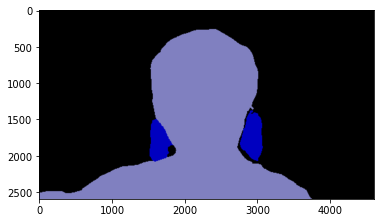

In [44]:
# segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중
# output을 matplotlib을 이용해 출력
plt.imshow(output)
plt.show()

In [45]:
# segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


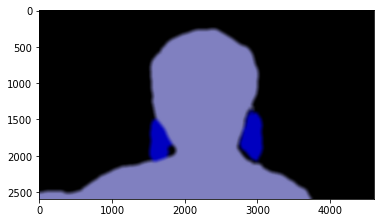

In [46]:
## 마스크 이미지를 blur 처리  ## =========================================================================
img_mask_blur = cv2.blur(output, (64, 64))

plt.imshow(img_mask_blur)
plt.show()

In [47]:
# 컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)
colormap[15]

array([192, 128, 128])

In [48]:
# 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있으므로
seg_color = (128,128,192)

(2592, 4608)


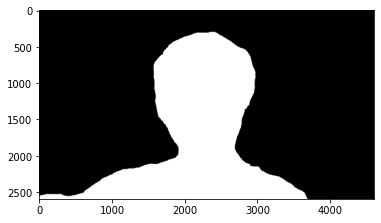

In [49]:
# YJKim_Mask_GBlur의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됨
# seg_color 값이 person 값이므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map = np.all(img_mask_blur==seg_color, axis=-1) 

print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

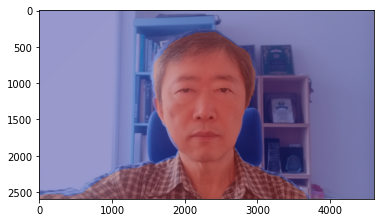

In [50]:
# Gaussian Blur 처리된 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한
# color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig.copy()
# True과 False인 값을 각각 255과 0으로 바꿔줌
img_mask = seg_map.astype(np.uint8) * 255
# 255와 0을 적당한 색상으로 바꿔봄
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
# 원본 이미지와 마스크를 적당한 비율로 합쳐봄
# 0.6과 0.4는 두 이미지를 섞는 비율
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

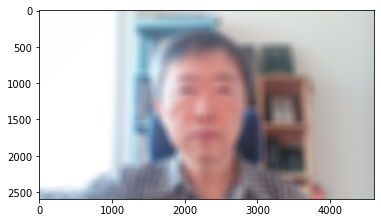

In [51]:
img_orig_blur = cv2.blur(img_orig, (128,128))  # (128,128)은 blurring kernel size
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽으므로
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

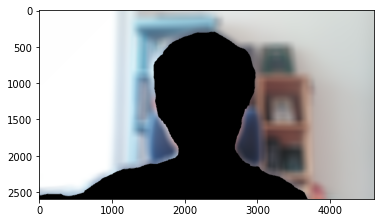

In [52]:
## 흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽으므로
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0이 됨
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있음
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됨. 결국 사람이 사라지고 배경만 남음
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

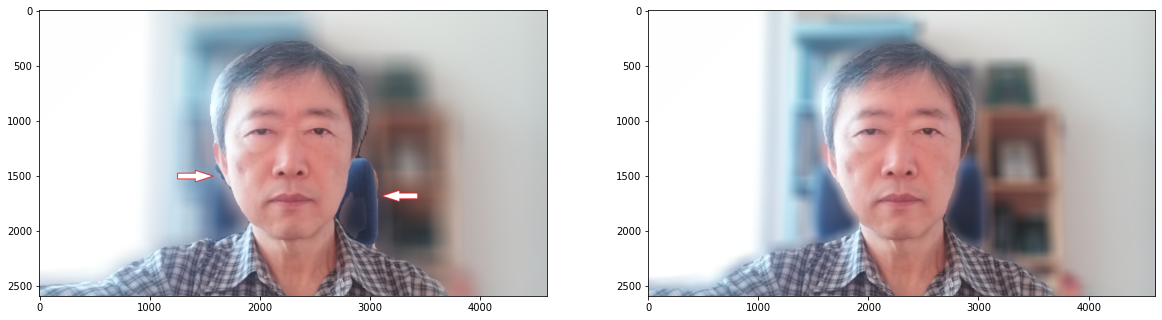

In [53]:
## 배경 영상과 사람 영상을 합치기

img_MarkUp = cv2.imread(img_path+'img_concat_problem_MarkUp.png')
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
images = [cv2.cvtColor(img_MarkUp, cv2.COLOR_BGR2RGB), cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB)]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
plt.show()

#### 의자의 머리받침 일부에 아웃포커싱 효과가 적용되지 않는 문제 및 배경과 사람의 경계부분이 자연스럽지
#### 못한 문제가 잘 해결 되었다.

## 회고
### <<이번 프로젝트에서 어려웠던 점>>

배경전환 크로마키사진 작성과정 중 마지막 합성하는 과정에 기 학습한 방법대로 해도 에러가 많이나서 실패하고 무식하게 픽셀을 하나하나 읽어가며 작성했다. 시간이 np.where 실행시 보다 많이 걸린다. 

### <<프로젝트를 진행하면서 알아낸 점 혹은 아직 모호한 점>>

생성항 seg_map을 이용하여 원본 이미지와 원본 blur 이미지를 합성하면 될것 같은데 위 code cell no. 50, 52과정이 왜 필요한지 모호하다.

### <<루브릭 평가 지표를 맞추기 위해 시도한 것들>>

의자 머리받침이 blur 차리 안되는 문제와 배경/사람 경계부분 자연스럽지 않은 문제를 해결하기 위하여 밝기의 정도, blur 처리의 정도 등을 변경시켜가며 좋은 상태를 찾아냈다. 

### <<만약에 루브릭 평가 관련 지표를 달성 하지 못했을 때, 이유에 관한 추정>>

평가지표를 달성 했다고 생각된다.

### <<자기 다짐>>

np.where가 잘 안됐던 원인 및 위 code cell no. 50, 52과정이 왜 필요한지 추가로 공부해야 하겠다.